In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/malaysia-salary-data/Malaysia_Salary_Data.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

**Load Dataset**

In [2]:
salaryData = pd.read_excel('/kaggle/input/malaysia-salary-data/Malaysia_Salary_Data.xlsx', index_col = 0)
salaryData.head

<bound method NDFrame.head of       Gender Education Level          Job Title  Years of Experience    Salary
Age                                                                           
32.0    Male      Bachelor's  Software Engineer                  5.0   5111.10
28.0  Female        Master's       Data Analyst                  3.0   3691.35
45.0    Male             PhD     Senior Manager                 15.0   8518.50
36.0  Female      Bachelor's    Sales Associate                  7.0   3407.40
52.0    Male        Master's           Director                 20.0  11358.00
...      ...             ...                ...                  ...       ...
32.0    Male      Bachelor's  Software Engineer                  8.0  10222.20
33.0  Female        Master's    Product Manager                 11.0  11074.05
24.0    Male      Bachelor's       Data Analyst                  2.0   5395.05
27.0    Male      Bachelor's  Software Engineer                  4.0   9086.40
25.0  Female      Bach

**Get some information dataset.**

In [3]:
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 32.0 to 25.0
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               998 non-null    object 
 1   Education Level      998 non-null    object 
 2   Job Title            998 non-null    object 
 3   Years of Experience  998 non-null    float64
 4   Salary               1000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


**There are differences in the non-null count from the dataset, check if any null values.**

In [4]:
rows_null = salaryData[salaryData.isnull().any(axis=1)]
rows_null

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Education Level,Job Title,Years of Experience,Salary
Age,,,,,
NaN,NaN,NaN,NaN,NaN,0.0
NaN,NaN,NaN,NaN,NaN,0.0


**Delete rows with null-values**

In [5]:
salaryData.dropna(inplace=True)
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 32.0 to 25.0
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               998 non-null    object 
 1   Education Level      998 non-null    object 
 2   Job Title            998 non-null    object 
 3   Years of Experience  998 non-null    float64
 4   Salary               998 non-null    float64
dtypes: float64(2), object(3)
memory usage: 46.8+ KB


**Get information from numerical data.**

In [6]:
salaryData.describe()

,Years of Experience,Salary
count,998.000000,998.000000
mean,7.230962,7676.400467
std,5.160903,2729.999857
min,0.000000,19.876500
25%,3.000000,5679.000000
50%,6.000000,7950.600000
75%,9.000000,10222.200000
max,25.000000,14197.500000


The minimum salary value is RM19.8765. It seems like a typo in there. It is better to correct it into RM 1,987.65.

In [7]:
salaryData['Salary'] = salaryData['Salary'].replace(19.8765, 1987.65)

In [8]:
salaryData.describe()

,Years of Experience,Salary
count,998.000000,998.000000
mean,7.230962,7678.372184
std,5.160903,2725.170790
min,0.000000,1703.700000
25%,3.000000,5679.000000
50%,6.000000,7950.600000
75%,9.000000,10222.200000
max,25.000000,14197.500000


Now it seems more relevant.
The average Years of Experience from the dataset is 7.2 with minimum value is 0 Years of experience and maximum value of 25 years.
The average Salary is RM7,676.40 with minimum Salary is RM1,703.70 and maximum is RM14,197.50

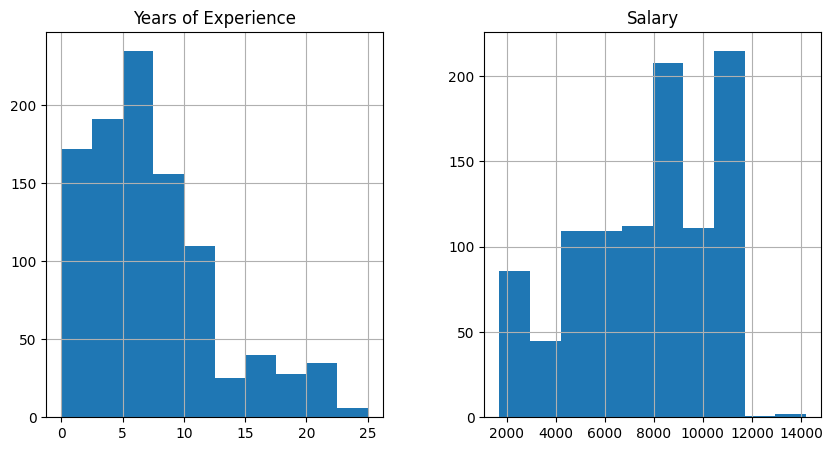

In [9]:
salaryData.hist(figsize = (10, 5))
plt.show()

**Let's see the gender distribution from the dataset**

Text(0.5, 1.0, 'Gender Distribution')

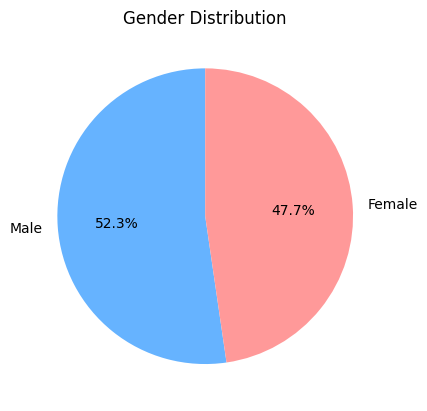

In [10]:
plt.pie(salaryData['Gender'].value_counts(), labels=salaryData['Gender'].value_counts().index, autopct='%1.1f%%', startangle = 90, colors=['#66b3ff', '#ff9999'])
plt.title('Gender Distribution')

The gender distribution is quite balance. There is +- 3% fo difference. 

**Now, let's see the Average Salary by Gender**

In [11]:
salaryData.groupby('Gender')['Salary'].mean().round(2)

Gender
Female    7831.29
Male      7538.93
Name: Salary, dtype: float64

It seems like Female has higher salary compared to Male with RM292.36 difference.

**Now let's see if there are difference in Average Salary regarding the Education Level**

In [12]:
edu_sal = salaryData.groupby(['Education Level', 'Gender'])['Salary'].mean().round(2).unstack()
print(edu_sal)

Gender               Female      Male
Education Level                      
Bachelor's          6205.62   7125.82
Bachelor's Degree   9682.70   9302.20
Master's            9049.87   8257.57
Master's Degree    10278.99  10591.34
PhD                 9891.71   9199.98


Opss, seems like there is naming conflict there. As we know, the Bachelor's and Bachelor's Degree is the same as well as the Master's and MAster's Degree. So, let's just combine them.

In [13]:
salaryData['Education Level'] = salaryData['Education Level'].replace("Bachelor's", "Bachelor's Degree")
salaryData['Education Level'] = salaryData['Education Level'].replace("Master's", "Master's Degree")
edu_sal = salaryData.groupby(['Education Level', 'Gender'])['Salary'].mean().round(2).unstack()
print(edu_sal)

Gender              Female     Male
Education Level                    
Bachelor's Degree  6265.83  7153.65
Master's Degree    9064.08  8318.99
PhD                9891.71  9199.98


It is better now. To have clearer perspective, let's build a visualization for this data.

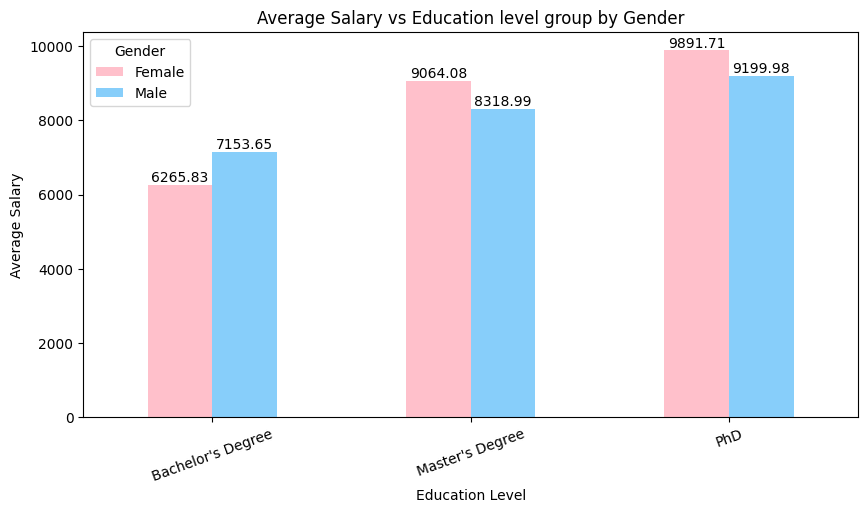

In [14]:
ax = edu_sal.plot(kind='bar', figsize=(10, 5), color=['pink', 'lightskyblue'])
plt.title('Average Salary vs Education level group by Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=20)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format value to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position on top of the bar
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

As we can see, there is increase of Average Salary with higher Education Level.
At Bachelor's Degree level, Male have higher Average Salary compared to Female with RM887.82 difference. However, this situation changed with the higher Education Level. Female have higher Average Salary compared to Male in both Master's Degree and PhD level with RM745.09 and RM691.73 respectively.

**Next, let's see the Average Salary by Job Title**

In [15]:
job_sal = salaryData.groupby('Job Title')['Salary'].mean().round(2).sort_values(ascending = True)
print(job_sal)

Job Title
Sales Representative                   1703.70
Help Desk Analyst                      1987.65
Data Entry Clerk                       1987.65
Junior Business Operations Analyst     1987.65
Junior Customer Support Specialist     1987.65
                                        ...   
Director                              11358.00
VP of Finance                         11358.00
Chief Data Officer                    12493.80
Chief Technology Officer              14197.50
CEO                                   14197.50
Name: Salary, Length: 174, dtype: float64


As we can see, Sales Representative has the lowest Average Salary with RM1703.70 followed by Help Desk Analyst and Data Entry Clerk. Meanwhile, on the other side, CEO and Chief Technology Officer both has the highest Average Salary with RM14,197.50 followed by Chief Data Officer and VP of Finance.

To see the full chart, let's creat a chart for this data.

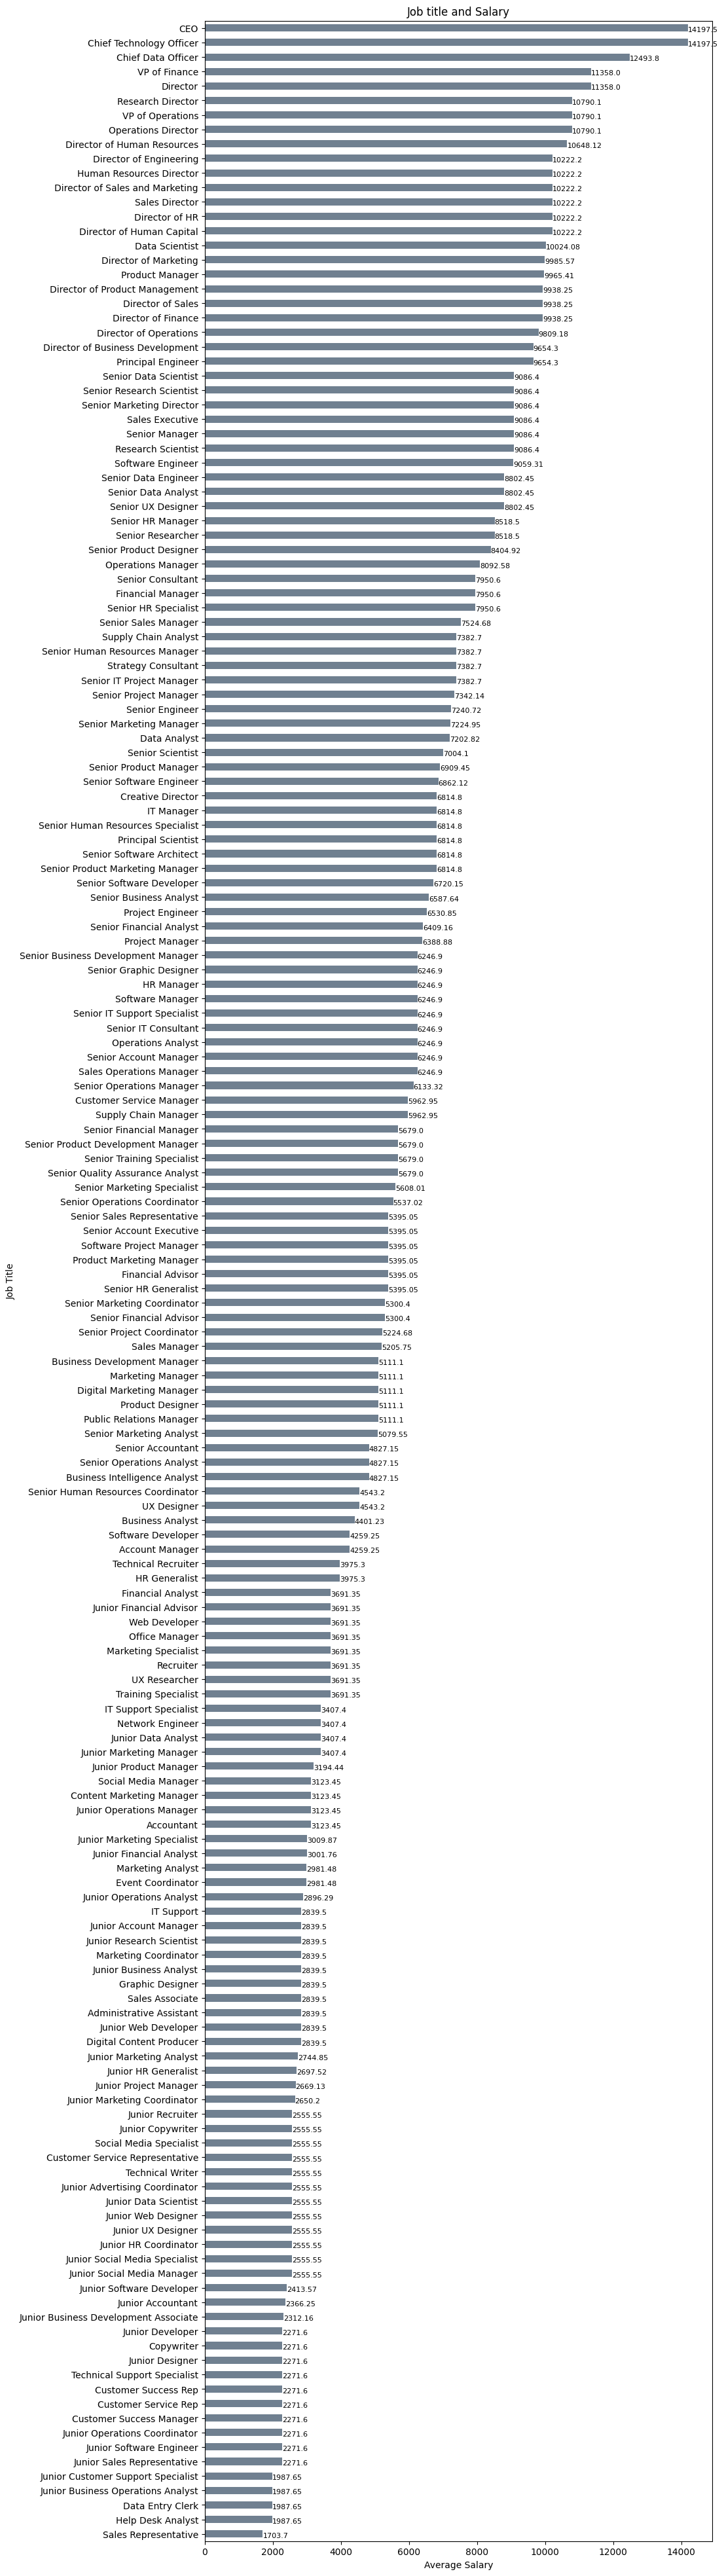

In [16]:
ax = job_sal.plot(kind='barh', figsize=(10, 50), color=['slategrey'])
plt.title('Job title and Salary')
plt.xlabel('Average Salary')
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y(),
             str(round((i.get_width()), 2)),
             fontsize=8,
             color='black')

**Let's see how Years of Experience affect Salary**

In [17]:
yoe_sal = salaryData.groupby('Years of Experience')['Salary'].mean().round(2)
print(yoe_sal)

Years of Experience
0.0      1893.00
0.5      1987.65
1.0      4923.97
1.5      2224.28
2.0      5009.48
3.0      6003.51
4.0      7103.02
5.0      7953.69
6.0      9006.31
7.0      8777.99
8.0      9042.97
9.0      9319.96
10.0     6465.95
11.0    10286.56
12.0     8444.09
13.0     7179.20
14.0     7142.43
15.0     7843.70
16.0     8944.42
17.0     8120.97
18.0     8496.66
19.0     9446.07
20.0     9588.77
21.0     9872.72
22.0     9212.60
23.0    10080.22
24.0    14197.50
25.0    11358.00
Name: Salary, dtype: float64


Make a graph to see a better perspective

Text(0, 0.5, 'Average Salary')

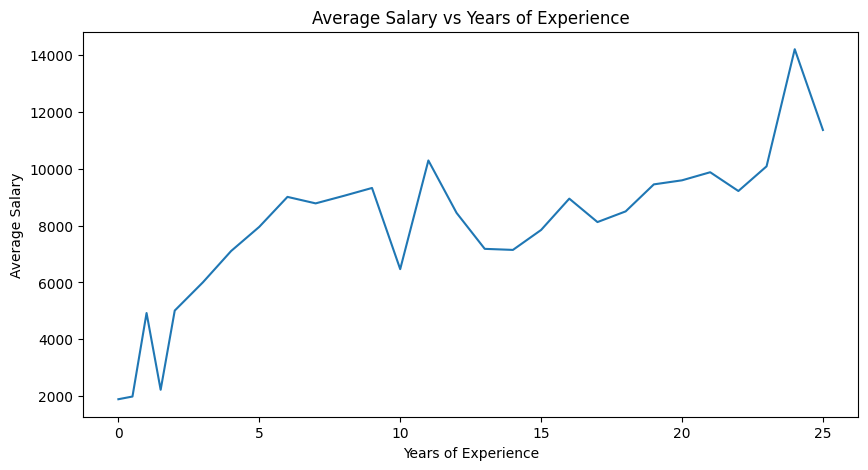

In [18]:
yoe_sal.plot(kind='line', figsize = (10, 5))
plt.title('Average Salary vs Years of Experience')
plt.ylabel('Average Salary')

As we can see, it is not really a good graph. We cannot generalize the trend from this lot of ups and downs graph.
Maybe Years of Experience should be binned to make grouped Years of Experience.

In [19]:
salaryData['Years of Experience Group'] = pd.cut(salaryData['Years of Experience'], bins=5)
salaryData.head()

,Gender,Education Level,Job Title,Years of Experience,Salary,Years of Experience Group
Age,,,,,,
32.0,Male,Bachelor's Degree,Software Engineer,5.0,5111.10,"(-0.025, 5.0]"
28.0,Female,Master's Degree,Data Analyst,3.0,3691.35,"(-0.025, 5.0]"
45.0,Male,PhD,Senior Manager,15.0,8518.50,"(10.0, 15.0]"
36.0,Female,Bachelor's Degree,Sales Associate,7.0,3407.40,"(5.0, 10.0]"
52.0,Male,Master's Degree,Director,20.0,11358.00,"(15.0, 20.0]"


Note that the bin size is 5.

In [20]:
yoe_sal2 = salaryData.groupby('Years of Experience Group')['Salary'].mean().round(2)
print(yoe_sal2)

Years of Experience Group
(-0.025, 5.0]    6134.69
(5.0, 10.0]      8872.55
(10.0, 15.0]     8965.02
(15.0, 20.0]     9037.60
(20.0, 25.0]     9988.96
Name: Salary, dtype: float64


<ipython-input-20-3380b52dc421>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yoe_sal2 = salaryData.groupby('Years of Experience Group')['Salary'].mean().round(2)


Text(0, 0.5, 'Average Salary')

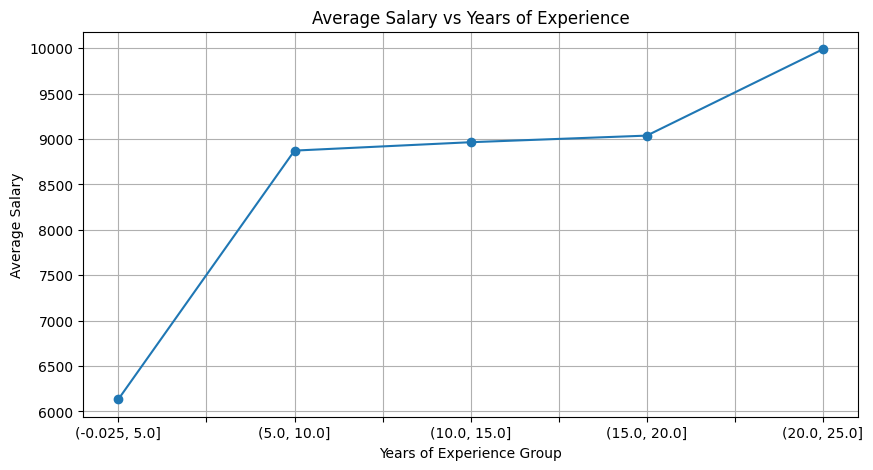

In [21]:
yoe_sal2.plot(kind='line', figsize = (10, 5), marker = 'o')
plt.grid(True)
plt.title('Average Salary vs Years of Experience')
plt.ylabel('Average Salary')

Now, the graph is more generalized. As we can see, overall, the is increase of Average Salary when the Years of Experience is increasing. However, the Average Salary is increasing at slow pace with the 5 Years of Experience up to 20 Years of Experience.